<a href="https://colab.research.google.com/github/kslim1025/Tensorflow_Clab/blob/master/ComputeLoss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

99 a: -1.480525 b: 7.354198 loss : 267.58844
199 a: -1.6185005 b: 12.218578 loss : 182.22806
299 a: -1.70075 b: 15.413009 loss : 151.90321
399 a: -1.7468516 b: 17.208899 loss : 143.81259
499 a: -1.7687474 b: 18.062338 loss : 142.2277
599 a: -1.7775325 b: 18.404787 loss : 142.0011
699 a: -1.7805159 b: 18.521076 loss : 141.97748
799 a: -1.7813733 b: 18.554502 loss : 141.9757
899 a: -1.7815815 b: 18.562613 loss : 141.97557
999 a: -1.7816238 b: 18.564262 loss : 141.97557


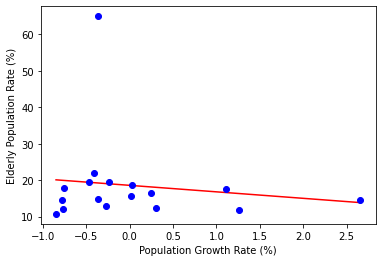

In [5]:
#ctrl+enter를 사용한 런타임가능
try:
  # %tensorflow_version only exists in Colab
  %tensorflow_version 2.x
except Exception:
  pass
# 넘파이는 수학과 과학 연산에 특화된 파이썬 모듈로 딥러닝에서도 유용하게 사용된다.
import numpy as np;
import tensorflow as tf;
import matplotlib.pyplot as plt;
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
import random;

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66];
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.38, 19.51, 12,65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.74, 14.42];

#X,Y평균을 구합니다
x_bar = sum(X) / len(X);
y_bar = sum(Y) / len(Y);

#a,b를 랜덤한 값으로 초기화 합니다
a = tf.Variable(random.random());
b = tf.Variable(random.random());

#전치의 제곱의 편균을 반환하는 함수입니다
def compute_loss():
  y_pred = a * X + b;
  loss = tf.reduce_mean((Y - y_pred) ** 2);
  return loss;

optimizer = tf.optimizers.Adam(lr = 0.07)
for i in range(1000):
  #잔차의 제곱의 평균을 최소화합니다
  optimizer.minimize(compute_loss, var_list=[a,b]);

  if i % 100 == 99:
    print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss :', compute_loss().numpy())


#그래프를 그리기 위해 회귀선의 x,y데이터를 구합니다
line_x = np.arange(min(X), max(X), 0.01);
line_y = a * line_x + b;

#붉은색 실선으로 회귀선을 그립니다
plt.plot(line_x, line_y, 'r-');
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)');
plt.ylabel('Elderly Population Rate (%)');
plt.show()